### Day 13: Comparing Brownian Motion vs Geometric Brownian Motion

This notebook compares:

- **Standard Brownian Motion (Wiener Process)**: purely random walk with zero drift.
- **Geometric Brownian Motion (GBM)**: used for modeling stock prices. Includes drift and volatility and ensures prices stay positive.

Useful for financial modeling, especially in options pricing and risk analysis.


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# === Parameters ===
S0 = 100         # Initial price for GBM
mu = 0.07        # Drift for GBM
sigma = 0.2      # Volatility for GBM
T = 1.0          # Time horizon (1 year)
dt = 1/252       # Daily steps (assuming 252 trading days)
N = int(T / dt)  # Number of steps
n_paths = 5      # Number of paths to simulate

# === Time array ===
time = np.linspace(0, T, N)

# === Simulate Brownian Motion paths ===
bm_paths = np.zeros((N, n_paths))
for i in range(n_paths):
    Z = np.random.standard_normal(N)
    bm_paths[:, i] = np.cumsum(np.sqrt(dt) * Z)

# === Simulate Geometric Brownian Motion paths ===
gbm_paths = np.zeros((N, n_paths))
gbm_paths[0] = S0
for i in range(1, N):
    Z = np.random.standard_normal(n_paths)
    gbm_paths[i] = gbm_paths[i-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)


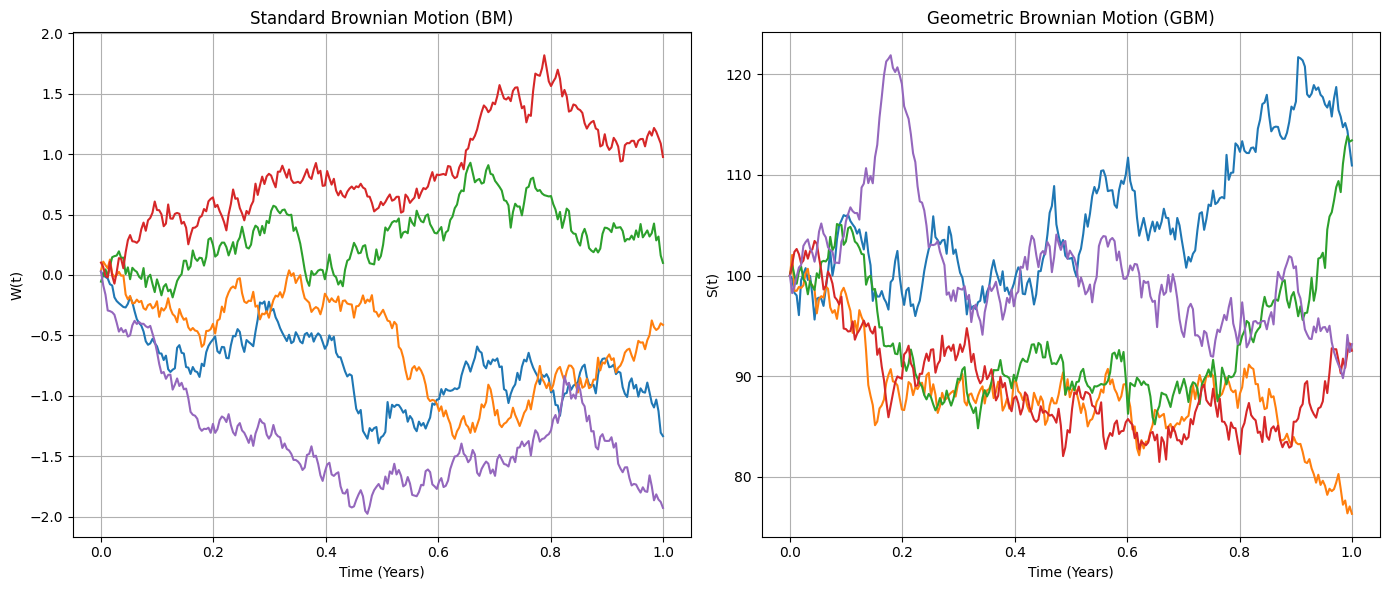

In [6]:
# === Plotting ===
plt.figure(figsize=(14, 6))

# Subplot 1: Standard Brownian Motion
plt.subplot(1, 2, 1)
plt.plot(time, bm_paths)
plt.title("Standard Brownian Motion (BM)")
plt.xlabel("Time (Years)")
plt.ylabel("W(t)")
plt.grid(True)

# Subplot 2: Geometric Brownian Motion
plt.subplot(1, 2, 2)
plt.plot(time, gbm_paths)
plt.title("Geometric Brownian Motion (GBM)")
plt.xlabel("Time (Years)")
plt.ylabel("S(t)")
plt.grid(True)

plt.tight_layout()
plt.show()
